In [212]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import plotly
from plotly.graph_objs import *
import plotly.offline as plot
import plotly.graph_objs as go
plot.offline.init_notebook_mode(connected=True)

In [37]:
cols = ['user id', 'item id', 'rating', 'timestamp']

In [68]:
user_data = pd.read_table('u.data', delim_whitespace = True, names = cols)

In [74]:
user_data.timestamp = pd.to_datetime(user_data.timestamp , unit = 's')

In [82]:
user_data['year'] = user_data.timestamp.dt.year

In [40]:
user_genre = pd.read_table('u.genre', sep = '|', names = ['genre', 'Indexed'])

In [41]:
user_genre.head()

,genre,Indexed
0,unknown,0
1,Action,1
2,Adventure,2
3,Animation,3
4,Children's,4


In [31]:
cols = ['user id', 'age',  'gender',  'occupation' , 'zip code']

In [32]:
user_user = pd.read_table('u.user', sep = '|', names = cols)

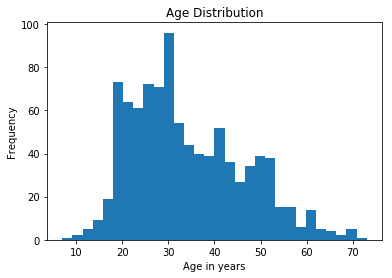

In [119]:
plt.hist(user_user.age, bins=30)
plt.xlabel('Age in years')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()


In [213]:
data = [go.Histogram(x = user_user.age)]


In [214]:
layout = dict(xaxis = dict(title = 'Age in years'),
              yaxis = dict(title ='Frequency'))
              

In [215]:
fig = dict(data = data, layout = layout)

In [216]:
plot.iplot(fig, 'Age Distribution')

In [218]:
data = [go.Histogram(x = user_data.rating)]

In [219]:
layout = dict(xaxis = dict(title = 'Ratings distribution'),
             yaxis = dict(title = 'Frequency'))

In [220]:
fig = dict(data = data, layout = layout)

In [221]:
plot.iplot(fig, "Ratings Distribution")

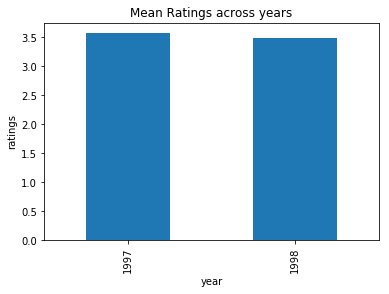

In [222]:
plot_avg_ratings = user_data.groupby('year').mean().iloc[:,2].plot(kind='bar', title = 'Mean Ratings across years')
plot_avg_ratings.set_ylabel('ratings')
plt.show()

In [223]:
user_data['Date'] = pd.DatetimeIndex(user_data['timestamp']).date

In [224]:
user_data.head()

,user id,item id,rating,timestamp,year,Date
0,196,242,3,1997-12-04 15:55:49,1997,1997-12-04
1,186,302,3,1998-04-04 19:22:22,1998,1998-04-04
2,22,377,1,1997-11-07 07:18:36,1997,1997-11-07
3,244,51,2,1997-11-27 05:02:03,1997,1997-11-27
4,166,346,1,1998-02-02 05:33:16,1998,1998-02-02


In [227]:
average_ratings = pd.DataFrame(user_data.groupby('Date').mean(), index = None)

In [229]:
average_ratings.head()

,user id,item id,rating,year
Date,,,,
1997-09-20,357.718033,417.546448,3.746448,1997.0
1997-09-21,573.436364,400.513939,3.552727,1997.0
1997-09-22,362.708709,434.487988,3.175676,1997.0
1997-09-23,551.305699,399.274611,3.670984,1997.0
1997-09-24,380.199647,359.296820,3.445230,1997.0


In [232]:
trace0 = Scatter(
            x = average_ratings.index,
            y = average_ratings.rating)
data = [trace0]
layout = dict(xaxis = dict(title = "Years"),
             yaxis = dict(title = "Ratings"))
fig = dict(data = data, layout = layout)
plot.iplot(fig, "Ratings across years")

In [123]:
user_data_merged = pd.merge(user_data, user_user)

In [124]:
user_data_merged.head()

,user id,item id,rating,timestamp,year,age,gender,occupation,zip code
0,196,242,3,1997-12-04 15:55:49,1997,49,M,writer,55105
1,196,393,4,1997-12-04 16:11:03,1997,49,M,writer,55105
2,196,381,4,1997-12-04 16:08:48,1997,49,M,writer,55105
3,196,251,3,1997-12-04 16:01:14,1997,49,M,writer,55105
4,196,655,5,1997-12-04 16:09:53,1997,49,M,writer,55105


In [294]:
agegender_user = pd.pivot_table(user_data_merged, index = ['age', 'gender'], aggfunc = 'mean')

In [295]:
agegender_user.head()

item id    rating     user id         year
age gender                                               
7   M       361.883721  3.767442   30.000000  1997.465116
10  M       411.129032  3.387097  471.000000  1998.000000
11  M       358.629630  2.925926  289.000000  1997.000000
13  F       429.927536  3.144928  647.623188  1998.000000
    M       480.385514  3.523364  807.200935  1997.151869

In [296]:
agegender_user.columns

Index(['item id', 'rating', 'user id', 'year'], dtype='object')

In [297]:
agegender_user = user_data_merged.groupby(['age','gender']).rating.mean()

In [298]:
agegender_user = pd.DataFrame(agegender_user)

In [299]:
agegender_user = agegender_user.unstack()

In [300]:
agegender_user.head()

rating          
gender         F         M
age                       
7            NaN  3.767442
10           NaN  3.387097
11           NaN  2.925926
13      3.144928  3.523364
14      3.375000       NaN

In [268]:
#agegender_user.reset_index(inplace = True)

In [301]:
agegender_user.head()

rating          
gender         F         M
age                       
7            NaN  3.767442
10           NaN  3.387097
11           NaN  2.925926
13      3.144928  3.523364
14      3.375000       NaN

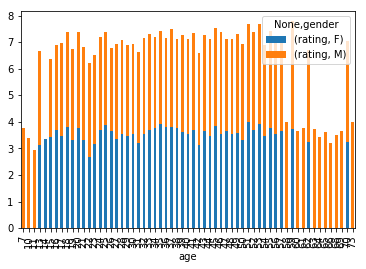

In [302]:
z = agegender_user.plot(kind='bar', stacked =True)

In [303]:
agegender_user.head()

rating          
gender         F         M
age                       
7            NaN  3.767442
10           NaN  3.387097
11           NaN  2.925926
13      3.144928  3.523364
14      3.375000       NaN

In [307]:
agegender_user.reset_index(inplace = True)

In [308]:
agegender_user.head()

age    rating          
gender             F         M
0        7       NaN  3.767442
1       10       NaN  3.387097
2       11       NaN  2.925926
3       13  3.144928  3.523364
4       14  3.375000       NaN

In [309]:
agegender_user['status'] = pd.cut(agegender_user['age'], bins=[6, 10, 20, 30, 40, 50, 60, 70, 80], labels=False)

In [310]:
agegender_user.head()

age    rating           status
gender             F         M       
0        7       NaN  3.767442      0
1       10       NaN  3.387097      0
2       11       NaN  2.925926      1
3       13  3.144928  3.523364      1
4       14  3.375000       NaN      1

In [311]:
import numpy as np
labels = np.array('7-10 11-20 21-30 31-40 41-50 51-60 61-70 71-80'.split())

In [312]:
agegender_user['status'] = labels[agegender_user['status']]

In [313]:
agegender_user.head()

age    rating           status
gender             F         M       
0        7       NaN  3.767442   7-10
1       10       NaN  3.387097   7-10
2       11       NaN  2.925926  11-20
3       13  3.144928  3.523364  11-20
4       14  3.375000       NaN  11-20

In [325]:
agegender_user = pd.DataFrame(agegender_user.groupby(['status']).mean(), index =None)

/home/user/assign2/lib/python3.5/site-packages/pandas/core/base.py:324: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [330]:
agegender_user.status = agegender_user.status.astype(str)


In [334]:
agegender_user.head()

age    rating          
gender                    F         M
status                               
11-20   15.888889  3.497686  3.349423
21-30   25.500000  3.432614  3.447094
31-40   35.500000  3.664806  3.523024
41-50   45.500000  3.540161  3.632427
51-60   55.500000  3.719219  3.715564

In [337]:
trace0 = Bar(
            x = agegender_user.age,
            y = agegender_user.rating.M,
            name = 'Male'
            )
trace1 = Bar(
            x = agegender_user.age,
            y = agegender_user.rating.F,
            name = 'Female')
data = [trace0 , trace1]
layout = dict(xaxis = dict(title = 'Age Range'),
              yaxis = dict(title = 'Ratings'),
              barmode = 'stack')
fig = dict(data = data, layout = layout)
plot.iplot(fig, 'Gender ratings Age analysis')

In [339]:
user_data_occupation = pd.DataFrame(user_data_merged.groupby('occupation').rating.mean(), index= None)

In [340]:
user_data_occupation.head()

,rating
occupation,
administrator,3.635646
artist,3.653380
doctor,3.688889
educator,3.670621
engineer,3.541407


In [341]:
trace0 = Bar(
        x = user_data_occupation.index,
        y = user_data_occupation.rating)
data =[trace0]
layout = dict(xaxis = dict(title = 'Ocupation'),
             yaxis = dict(title = "Rating"))
fig = dict(data = data, layout = layout)
plot.iplot(fig,"Occupation Rating Analysis")